In [1]:
import pandas as pd

# Read in the data
df = pd.read_csv('Taylor Swift or AI_.csv.zip', compression='zip', header=0, sep=',', quotechar='"', encoding='utf8')

df.head(1)

,Timestamp,Total score,How well do you think you know Taylor Swift?,How well do you think you know Taylor Swift? [Score],How well do you think you know Taylor Swift? [Feedback],Which verse is written by Taylor Swift?,Which verse is written by Taylor Swift? [Score],Which verse is written by Taylor Swift? [Feedback],Please explain your thinking for the previous question (Optional),Please explain your thinking for the previous question (Optional) [Score],...,Which verse is written by Taylor Swift? [Feedback].8,Please explain your thinking for the previous question (Optional).8,Please explain your thinking for the previous question (Optional) [Score].8,Please explain your thinking for the previous question (Optional) [Feedback].8,Which verse is written by Taylor Swift?.9,Which verse is written by Taylor Swift? [Score].9,Which verse is written by Taylor Swift? [Feedback].9,Please explain your thinking for the previous question (Optional).9,Please explain your thinking for the previous question (Optional) [Score].9,Please explain your thinking for the previous question (Optional) [Feedback].9
0,2023/11/02 10:30:02 PM EST,4.00 / 10,1,-- / 0,NaN,She might catch your stare and flatter your eg...,0.00 / 1,NaN,NaN,-- / 0,...,NaN,NaN,-- / 0,NaN,In the quiet where your laughter rings. I find...,0.00 / 1,NaN,NaN,-- / 0,NaN


<Axes: >

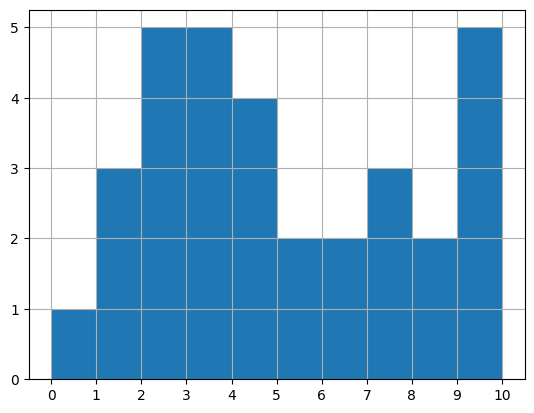

In [2]:
# Create histogram of Total score
df['Total score'].apply(lambda x: int(x.split('.')[0])).sort_values().astype(str).hist()

<Axes: >

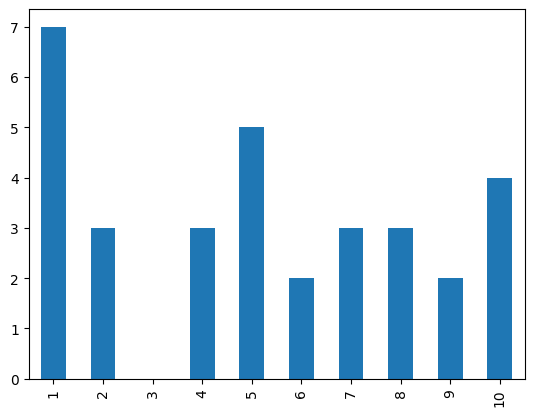

In [3]:
value_counts = df['How well do you think you know Taylor Swift?'].sort_values().astype(str).value_counts()

# Make sure all bins are present
for i in range(1, 11):
    if str(i) not in value_counts:
        value_counts[str(i)] = 0

value_counts.index = value_counts.index.astype(int)
value_counts.sort_index().plot(kind='bar')

In [4]:
# Load lines from questions.txt
with open('questions.txt', 'r', encoding='utf8') as f:
    questions = f.readlines()

ten_epochs = []
real = []
twenty_epochs = []
gpt4 = []

for i in range(10):
    ten_epochs.append(questions[i * 4].strip())
    real.append(questions[i * 4 + 1].strip())
    twenty_epochs.append(questions[i * 4 + 2].strip())
    gpt4.append(questions[i * 4 + 3].strip())

print(ten_epochs[0])
print(real[0])
print(twenty_epochs[0])
print(gpt4[0])

She might catch your stare and flatter your ego. But she'll never keep you down in your bed at night. All Lights Down Low, oh-oh-oh. 'Cause it's dark 'til you leave
There's a fire inside of you. That can't help but shine through. She's never gonna see the light. No matter what you do
You don't know how it could be. Anything you want it to. If you only knows me. We could be an invisible army, unbreakable
There's a fire inside of you. That you keep hidden away. But I see the flickers through. In every word you don't say


In [5]:
n_ten_epochs = 0
n_twenty_epochs = 0
n_real = 0
n_gpt4 = 0

for i in range(10):
    key = 'Which verse is written by Taylor Swift?' + ('.' + str(i) if i > 0 else '')

    n_ten_epochs += (df[key] == ten_epochs[i]).sum()
    n_twenty_epochs += (df[key] == twenty_epochs[i]).sum()
    n_real += (df[key] == real[i]).sum()
    n_gpt4 += (df[key] == gpt4[i]).sum()


print('ten epochs:', n_ten_epochs)
print('twenty epochs:', n_twenty_epochs)
print('real:', n_real)
print('gpt4:', n_gpt4)

ten epochs: 55
twenty epochs: 26
real: 151
gpt4: 88


In [6]:
# Total should be 320
n_ten_epochs + n_twenty_epochs + n_real + n_gpt4

320

In [7]:
num_times_chosen = {}

for i in range(10):
    key = 'Which verse is written by Taylor Swift?' + ('.' + str(i) if i > 0 else '')

    for verse in [ten_epochs[i], twenty_epochs[i], real[i], gpt4[i]]:
        num_times_chosen[verse] = (df[key] == verse).sum()

In [8]:
least_chosen = [(k, v) for k, v in sorted(num_times_chosen.items(), key=lambda item: item[1])]

for (k, v) in least_chosen[:10]:
    print(f'{k[:30]}: {v}')

Bustling all around. Some thin: 0
Please tell me how we'll get a: 1
Do you think I'm cursed, dropp: 1
Hey, we break up but. Babies m: 1
Memory makin' and heartbreak l: 2
'Cause she's the kind of book : 2
No flash bulbs, they pass me. : 2
When Emma falls in love, she w: 3
We played rooms full of strang: 3
Me and my frayed nerves and ti: 3


In [9]:
most_chosen = [(k, v) for k, v in sorted(num_times_chosen.items(), key=lambda item: item[1], reverse=True)]

for (k, v) in most_chosen[:10]:
    print(f'{k[:30]}: {v}')

And she's the kind of book tha: 20
Industry disruptors and soul d: 19
I can't decide if it's a choic: 17
Third floor on the West Side, : 17
Our songs, our films, united w: 16
What must it be like to grow u: 16
I want you to know. I'm a mirr: 14
There's a fire inside of you. : 12
There's a fire inside of you. : 12
Standing in the shadow of what: 12
